<h1>Sentiment analysis using Distilroberta, Cryptobert and SHAP</h1>

<p>Transparency, explainability, and accountability 

# Scope and Background information

In recent years, technological developments and primary events had a major impact on the financial markets. This was particularly evident during the global Covid-19 pandemic, when, for Bitcoin reached its all-time high in 2021 and 2024 (CoinMarketCap, n.d.). In this case, it offers the opportunity to use various methods to predict potential price changes. Therefore, analyzed studies identified that the news and social media play a decisive role for the exchange of information and opinions between experts and investors. As a result, the objective of this project is to implement, apply and compare different mashine learning models based on financial datasets. Additionally, the implementation of SHAP therefore allows to gain a comprehensive understanding of influencing factors and to explore the performance of the models. 

CoinMarketCap. (n.d.). Cryptocurrency Prices, Charts And Market Capitalizations | CoinMarketCap. https://coinmarketcap.com/

## State of the art:

The current literature indicates the importance of applying explainability in order to get a better understanding of the model. Overall, there is a lot of literature available that focuses on implementing different models and investigates steps to improve the model performance and efficiency as well as identify influential features


   - The study by Goodell et al. (2023) examines the use of an explainable artificial intelligence framework to predict the behavior of cryptocurrencies. The authors argue that existing methods often lack explanatory power. For this reason, the aim of the paper is to develop a more robust forecasting model that improves both generalisability and interpretability by integrating an explainable artificial intelligence framework with a SHAP-based approach. The results of Goodell et al. (2023) highlight that XAI modeling was able to identify cryptocurrency prices during the Russian-Ukraine war and thereby additionally discovered critical factors which influenced transactions. In this case, by introducing XAI techniques, a more transparent and comprehensible use of machine learning applications in relation to financial operating systems can be realized.   

      - Goodell, J. W., Jabeur, S. B., Saâdaoui, F. & Nasir, M. (2023). Explainable artificial intelligence modeling to forecast bitcoin prices. International Review Of Financial Analysis (Online)/International Review Of Financial Analysis, 88, 102702. https://doi.org/10.1016/j.irfa.2023.102702 


   - Wang et al. (2023) investigate the application of different machine learning methods to predict the volatility of four cryptocurrencies based on internal and external determinants. The results confirm that both random forest and long-short-term memory networks perform significantly better on complex dynamic cryptocurrencies than previous models. In addition, the authors were able to achieve improved forecasting performance by integrating optimization models. By using Shapley additive exPlanations, Wang et al. (2023) additionally determined that internal determinants such as past volatility and trading data are the most decisive. As a result, the study contributes to a deeper understanding of the cryptocurrency market (Wang et al., 2023).
   
      - Wang, Y., Andreeva, G., & Martin-Barragan, B. (2023b). Machine learning approaches to forecasting cryptocurrency volatility: Considering internal and external determinants. International Review of Financial Analysis (Online)/International Review of Financial Analysis, 90, 102914. https://doi.org/10.1016/j.irfa.2023.102914

   - Ueda et al. (2024) propose a social media text embedding method to predict the volatility of financial markets. Compared to other studies, the authors focus on the relationship between topic and sentiment using a novel document embedding technique. The model shows the potential for high price prediction performance during increased market volatility. The effective prediction was also confirmed with the use of Shapley additive explanations-experiment. Consequently, the findings of the study contribute to the current research with the objective to reduce investment risks (Ueda et al., 2024). 
   
      - Ueda, K., Suwa, H., Yamada, M., Ogawa, Y., Umehara, E., Yamashita, T., Tsubouchi, K. & Yasumoto, K. (2024). SSCDV: Social media document embedding with sentiment and topics for financial market forecasting. Expert Systems With Applications, 245, 122988. https://doi.org/10.1016/j.eswa.2023.122988 

   - Adhikari et al. (2023) focuses on enhancing sentiment analysis in the financial sector, which is crucial for helping investors make informed decisions. Given the vast amount of financial news and texts, analyzing sentiments accurately is challenging due to complex language attributes like word usage, semantics, syntax, and polysemy. Current approaches struggle with these complexities and lack interpretability, making it difficult for users to trust the predictions. To address these issues, the researchers propose an explainable hybrid word representation method. This method first deals with class imbalance by augmenting the data and then combines three types of embeddings to capture polysemy, semantics, and syntax. The combined word representation is fed into a convolutional neural network (CNN) with an attention mechanism to analyze sentiments (Adhikari et al., (2023).
      - Adhikari, S., Thapa, S., Naseem, U., Lu, H. Y., Bharathy, G., & Prasad, M. (2023). Explainable hybrid word representations for sentiment analysis of financial news. Neural Networks, 164, 115–123. https://doi.org/10.1016/j.neunet.2023.04.011

## Research question

- **RQ 1**:
   - What are the important features in the sentiment analysis of cryptocurrency and stock news/tweets using DistilRoberta-financial-sentiment/Cryptobert and SHAP? 
- **RQ 2**:
   - How do the predictions of a sentiment analysis of cryptocurrency and stock news compare to each other using SHAP? 
- **RQ 3**:
   - How do the results of DistilRoberta-financial-sentiment (finetuned on financial news) compare with cryptobert (finetuned on crypto news)?
- **RQ 4**:
   - What are possible applications where explainable sentiment analysis could be used productive?



Besides the analysis of datasets and application of models, we worked on other practical applications. The workflow can be seen here:


## Dataset implementation and processing

In [1]:
import pandas as pd
import sklearn
import shap
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import TextClassificationPipeline, AutoModelForSequenceClassification, AutoTokenizer
from transformers import pipeline
from datasets import load_dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

/Users/pascalcsukovits/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/pascalcsukovits/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Import all cleaned dataset and analyze initial file characteristics

The data import is described in the document 1_SHAP_Sentiment_Data.ipynb

The process of cleaning the datasets is described in the document 2_SHAP_Sentiment_preprocessing.ipynb 

### Analyze performance of sentiment analysis on different datasets and compare them

We import three different datasets to work on our workflow. 
For Distilroberta, we import:
- takala/financial_phrasebank from HuggingFace (https://huggingface.co/datasets/takala/financial_phrasebank#data-fields)
    - Dataset Summary: Polar Sentiment dataset contains 4840 English sentences related to financial news for classifying sentences into positive, negative or neutral category. 

For Cryptobert, we import:
- ElKulako/stocktwits-crypto from HuggingFace (https://huggingface.co/datasets/ElKulako/stocktwits-crypto)
    - The StockTwits-crypto dataset represents cryptocurrency-related contributions from the StockTwits website from November 1, 2021 to June 15, 2022. In addition, the data has already been cleaned and pre-processed.

Then, to compare the perfomance of both models on another dataset and to compare the results for both SHAP and general sentiment analysis:
- StephanAkkerman/financial-tweets-stocks from HuggingFace (https://huggingface.co/datasets/StephanAkkerman/financial-tweets-stocks)
    - This dataset is ideal for conducting sentiment analysis with different models. The data also includes information on, for example, price changes, tweet and stock type, stock and timestamp,...

In [2]:
#Dataset to investigate accuracy of the model

#Distilroberta
ds_stocks = load_dataset("takala/financial_phrasebank", name="sentences_50agree") #https://huggingface.co/datasets/takala/financial_phrasebank#data-fields
df_stocks_pred = ds_stocks['train'].to_pandas()

#Cryptobert
df_crypto = pd.read_excel('data/stockwits/stockwits_crypto.xlsx')

#New Dataset
df_compare = pd.read_csv('data/finance_stocks/finance_stocks-train-cleaned.csv')


In [3]:
df_stocks_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  4846 non-null   object
 1   label     4846 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 75.8+ KB


In [4]:
df_stocks_pred.head()

sentence  label
0  According to Gran , the company has no plans t...      1
1  Technopolis plans to develop in stages an area...      1
2  The international electronic industry company ...      0
3  With the new production plant the company woul...      2
4  According to the company 's updated strategy f...      2

In [5]:
df_crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    599975 non-null  object
 1   label   600000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 9.2+ MB


In [6]:
df_crypto.head()

text  label
0  if you were curious, price chose the lowest ch...      1
1             true, not even 10k followers here yet.      1
2  dogecoin co-founder billy markus hits back at ...      1
3   i’m curious, do any bulls have a price where ...      1
4             friday everybody buy 10 more on friday      2

#### Insights about the distribution of sentiment labels

In [7]:
#Crypto
def change_labels_crypto(label):
    if label == 0:
        return "Bearish"
    elif label == 1:
        return "Neutral"
    elif label == 2:
        return "Bullish"
    else:
        return None
    
df_crypto['label'] = df_crypto['label'].apply(change_labels_crypto)

#Stocks
def change_labels_stocks(label):
    if label == 0:
        return "negative"
    elif label == 1:
        return "neutral"
    elif label == 2:
        return "positive"
    else:
        return None

df_stocks_pred['label'] = df_stocks_pred['label'].apply(change_labels_stocks)

As the Cryptobert dataset consists of almost 60.000 rows, a sample of 6.000 values is selected to increase the performance and efficiency of the models.

In [8]:
neutral_df_crypto = df_crypto[df_crypto['label'] == 'Neutral']
bullish_df_crypto = df_crypto[df_crypto['label'] == 'Bullish']
bearish_df_crypto = df_crypto[df_crypto['label'] == 'Bearish']

neutral_sample_crypto = neutral_df_crypto.sample(n=2000, random_state=1)
bullish_sample_crypto = bullish_df_crypto.sample(n=2000, random_state=1)
bearish_sample_crypto = bearish_df_crypto.sample(n=2000, random_state=1)

balanced_df_crypto = pd.concat([neutral_sample_crypto, bullish_sample_crypto, bearish_sample_crypto])

balanced_df_crypto = balanced_df_crypto.sample(frac=1, random_state=1).reset_index(drop=True)
balanced_df_crypto['label'].value_counts().plot(kind='bar')

<Axes: xlabel='label'>

In the case of Distilroberta, the dataset already shows a sufficient number of values that are suitable for determining the accuracy

In [9]:
df_stocks_pred['label'].value_counts().plot(kind='bar')

<Axes: xlabel='label'>

## Accuracy of both models on different datasets

### Cryptobert

Import the model and pipeline form Cryptobert

In [10]:
#Cryptobert
model_name = "ElKulako/cryptobert"
tokenizer_crypto = AutoTokenizer.from_pretrained(model_name, use_fast=True)
model_crypto = AutoModelForSequenceClassification.from_pretrained(model_name)
pipe_crypto = TextClassificationPipeline(model=model_crypto, tokenizer=tokenizer_crypto, max_length=64, truncation=True, padding='max_length')

Use the prepared dataset and preprocessed text

In [11]:
texts = balanced_df_crypto['text'].astype(str).tolist()
predictions = pipe_crypto(texts)

Get accurarcy data to compare and understand the results.

In [12]:
true_labels_crypto = balanced_df_crypto['label'].tolist()
label_mapping_crypto = {"Bearish": 0, "Neutral": 1, "Bullish": 2}
inv_label_mapping_crypto = {v: k for k, v in label_mapping_crypto.items()}

predicted_labels_crypto = [label_mapping_crypto[pred['label']] for pred in predictions]
balanced_df_crypto['predicted_label'] = predicted_labels_crypto
true_labels_numeric_crypto = [label_mapping_crypto[label] for label in true_labels_crypto]

accuracy = accuracy_score(true_labels_numeric_crypto, predicted_labels_crypto)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels_numeric_crypto, predicted_labels_crypto, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

precision_per_class, recall_per_class, f1_per_class, _ = precision_recall_fscore_support(true_labels_numeric_crypto, predicted_labels_crypto, average=None, labels=[0, 1, 2])

for i, label in inv_label_mapping_crypto.items():
    print(f"{label} Precision: {precision_per_class[i]}")
    print(f"{label} Recall: {recall_per_class[i]}")
    print(f"{label} F1-Score: {f1_per_class[i]}")

Accuracy: 0.7668333333333334
Precision: 0.7619906907670323
Recall: 0.7668333333333334
F1-Score: 0.7573649229335047
Bearish Precision: 0.8647342995169082
Bearish Recall: 0.9845
Bearish F1-Score: 0.9207388356324526
Neutral Precision: 0.7280761386811693
Neutral Recall: 0.5355
Neutral F1-Score: 0.6171132238547969
Bullish Precision: 0.6931616341030196
Bullish Recall: 0.7805
Bullish F1-Score: 0.7342427093132643


### DistilRoberta

- '0': negative
- '1': neutral
- '2': positive

#### Sentiments that are not relevant from an economic/financial perspective are neutral (https://huggingface.co/datasets/takala/financial_phrasebank#data-fields)

In [13]:
pipe_DR = pipeline("text-classification", model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

In [14]:
texts = df_stocks_pred['sentence'].astype(str).tolist()
predictions = pipe_DR(texts)

In [15]:
true_labels_stocks = df_stocks_pred['label'].tolist()
label_mapping_stocks = {"negative": 0, "neutral": 1, "positive": 2}
inv_label_mapping_stocks = {v: k for k, v in label_mapping_stocks.items()}

predicted_labels_stocks = [label_mapping_stocks[pred['label']] for pred in predictions]
df_stocks_pred['predicted_label'] = predicted_labels_stocks
true_labels_numeric_stocks = [label_mapping_stocks[label] for label in true_labels_stocks]

accuracy = accuracy_score(true_labels_numeric_stocks, predicted_labels_stocks)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels_numeric_stocks, predicted_labels_stocks, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

precision_per_class, recall_per_class, f1_per_class, _ = precision_recall_fscore_support(true_labels_numeric_stocks, predicted_labels_stocks, average=None, labels=[0, 1, 2])

for i, label in inv_label_mapping_stocks.items():
    print(f"{label} Precision: {precision_per_class[i]}")
    print(f"{label} Recall: {recall_per_class[i]}")
    print(f"{label} F1-Score: {f1_per_class[i]}")

Accuracy: 0.8586463062319438
Precision: 0.8585183822525033
Recall: 0.8586463062319438
F1-Score: 0.8581762983745082
negative Precision: 0.8759259259259259
negative Recall: 0.7831125827814569
negative F1-Score: 0.8269230769230769
neutral Precision: 0.8773297187394103
neutral Recall: 0.8992705800625217
neutral F1-Score: 0.8881646655231561
positive Precision: 0.811070110701107
positive Recall: 0.8063096111518708
positive F1-Score: 0.8086828550404709


# Sentiment Analysis:  Accuracy, Precision, Recall and F1-Socre Evaluation

This documentation provides an overview of the code used for evaluating the performance of the sentiment analysis model CryptoBert that predicts three classes: "Bullish", "Bearish", and "Neutral", as well as for the model Distilroberta predicting, "positive", "negative" or "netural". The documentation also explains the evaluation metrics and their results.

## Code Description

The code performs the following steps:

1. **Load and Prepare Data**:
   - Cryptobert represents a dataframe `balanced_df_crypto` with columns `text` (containing the text data) and `label` (containing the true sentiment labels).
   - Distilroberta `df_stocks_pred` consits of the columns  `sentence` and `label` which contain the sentiment that have been agreed on by 50% of the annotator

2. **Text and Label Preparation**:
   - Converts the text data to a list of strings and true sentiment labels to a list.

3. **Label Mapping**:
   - Defines a mapping from string labels to numeric labels for processing.
   - Creates an inverse mapping to convert numeric predictions back to string labels.

4. **Model Predictions**:
   - Both models use a pipeline `pipe` to generate predictions for the text data. Cryptobert: `pipe_crypto` and DistilRoberta: `pipe_DR`
   - Extracts the predicted labels and maps them to numeric labels.

5. **Metric Calculation**:
   - Calculates accuracy, precision, recall, and F1-score using `accuracy_score` and `precision_recall_fscore_support` from `sklearn.metrics`.
   - Computes precision, recall, and F1-score for each sentiment class individually.

6. **Result Display**:
   - Prints the overall accuracy, precision, recall, and F1-score.
   - Prints precision, recall, and F1-score for each sentiment class (Bullish, Bearish, Neutral as well as positive, negative, neutral).

## Results

The performance of the sentiment analysis model is summarized below:

- **Overall Metrics Distilroberta**:
  - **Accuracy**: 0.8586
    - Model is able to predict the determined sentiment about 85.86% of the time.
  - **Precision**: 0.8585
    - On average, 85.85% of the positive predictions are correct.
  - **Recall**: 0.8586
    - The model correctly identifies 85.86% of all actual sentiments.
  - **F1-Score**: 0.8581
    - The balance between precision and recall is 85.81%.
   
- **Overall Metrics CryptoBert**:
  - **Accuracy**: 0.7668
    - The model correctly predicts the sentiment about 76.68% of the time.
  - **Precision**: 0.7619
    - On average, 76.19% of the positive predictions are correct.
  - **Recall**: 0.7668
    - The model correctly identifies 76.68% of all actual sentiments.
  - **F1-Score**: 0.7573
    - The balance between precision and recall is 75.73%.

- **Class-wise Metrics Distilroberta**:
  - **negative Sentiment**:
    - **Precision**: 0.8759
    - **Recall**: 0.7831
    - **F1-Score**: 0.8269
  - **neutral Sentiment**:
    - **Precision**: 0.8773
    - **Recall**: 0.8992
    - **F1-Score**: 0.8881
  - **positive Sentiment**:
    - **Precision**: 0.8110
    - **Recall**: 0.8063
    - **F1-Score**: 0.8086

- **Class-wise Metrics Cryptobert**:
  - **Bearish Sentiment**:
    - **Precision**: 0.8647
    - **Recall**: 0.9845
    - **F1-Score**: 0.9207
  - **Neutral Sentiment**:
    - **Precision**: 0.7280
    - **Recall**: 0.5355
    - **F1-Score**: 0.6171
  - **Bullish Sentiment**:
    - **Precision**: 0.6931
    - **Recall**: 0.7805
    - **F1-Score**: 0.7342

### First analysis of SHAP values based on individual datasets for Distilroberta and cryptobert

Now, we try to use SHAP to take a look at the most important words that push the model to declare a label on the sentence. We compare the results for both cryptobert and distilroberta.

With SHAP, you can create two graphs:
- Local optimum: Shows the sentence and highlights with color the value provided and to what label it contribiuted
- Global optimum: Shows graphs that summarizes the words with the highest impact to push the label in a certain direction.

Overall it is to note that SHAP does not seem to be that useful for understanding sentiment analysis purposes than for other use cases. Naturally, it can give you an understanding on what pushes sentiments in one direction or another (this could be interesting for real time analysis of comments over multiple social-media accounts) however, overall the information degree is limited. We tried to clean the data as good as possible, but since we're dealing with data from Twitter, the text quality is realively low. It is further making it hard for the model through the tickers of stocks. 

Moreover, our models did not incorporate sarcasm or similar emotional context necessary to really understand social cues in text. This can naturally limit the sentiment analysis and would be necessary to implement in another step.

Sample was reduced to first ten rows, in order to achieve time efficiencies

In [16]:
shap_train_crypto = balanced_df_crypto.head(10)
shap_train_stocks = df_stocks_pred.head(10)

In [17]:
shap_text_train_df_stocks = shap_train_stocks['sentence'].astype(str).tolist()
shap_text_train_df_crypto = shap_train_crypto['text'].astype(str).tolist()

In [18]:
explainer_DR_train = shap.Explainer(pipe_DR)
shap_values_DR_train = explainer_DR_train(shap_text_train_df_stocks)

PartitionExplainer explainer: 11it [01:45, 10.55s/it]                        


In [19]:
explainer_CB_train = shap.Explainer(pipe_crypto)
shap_values_CB_train = explainer_CB_train(shap_text_train_df_crypto)

PartitionExplainer explainer: 11it [02:16, 13.70s/it]                        


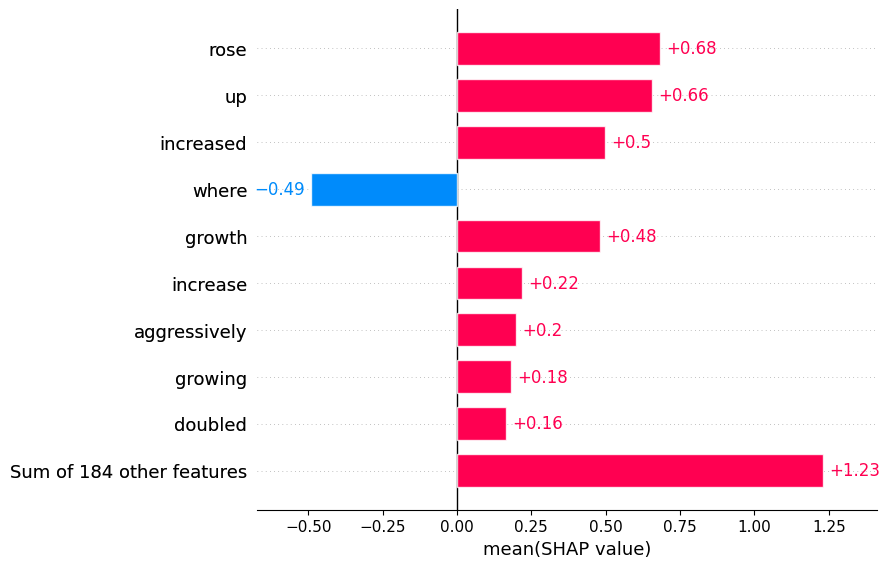

In [20]:
shap.plots.bar(shap_values_DR_train[:, :, "positive"].mean(0))

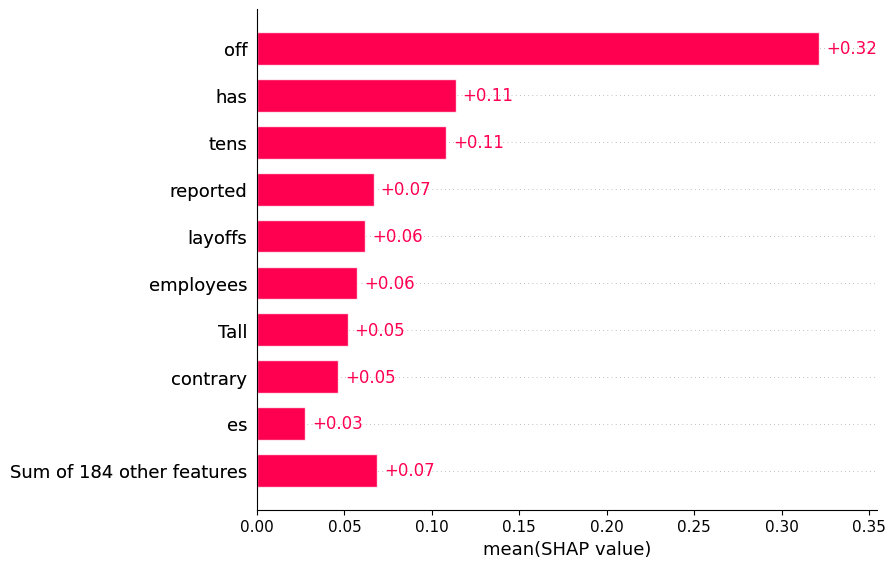

In [21]:
shap.plots.bar(shap_values_DR_train[:, :, "negative"].mean(0))

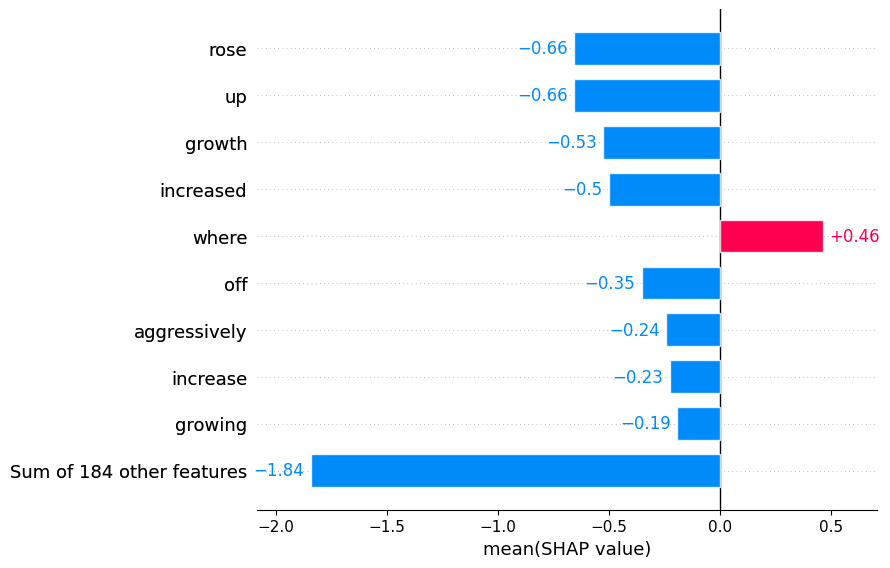

In [22]:
shap.plots.bar(shap_values_DR_train[:, :, "neutral"].mean(0))

In [23]:
shap.plots.bar(shap_values_CB_train[:, :, "Bullish"].mean(0))

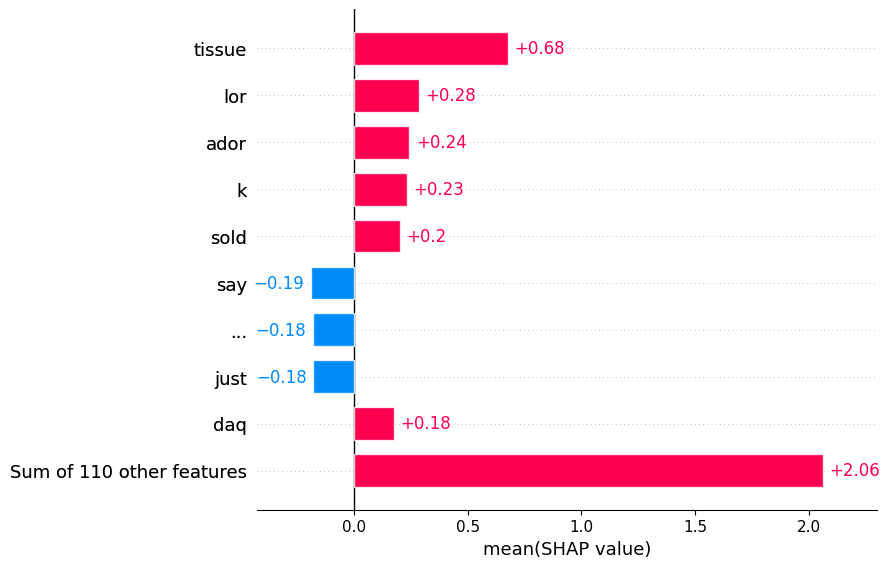

In [24]:
shap.plots.bar(shap_values_CB_train[:, :, "Bearish"].mean(0))

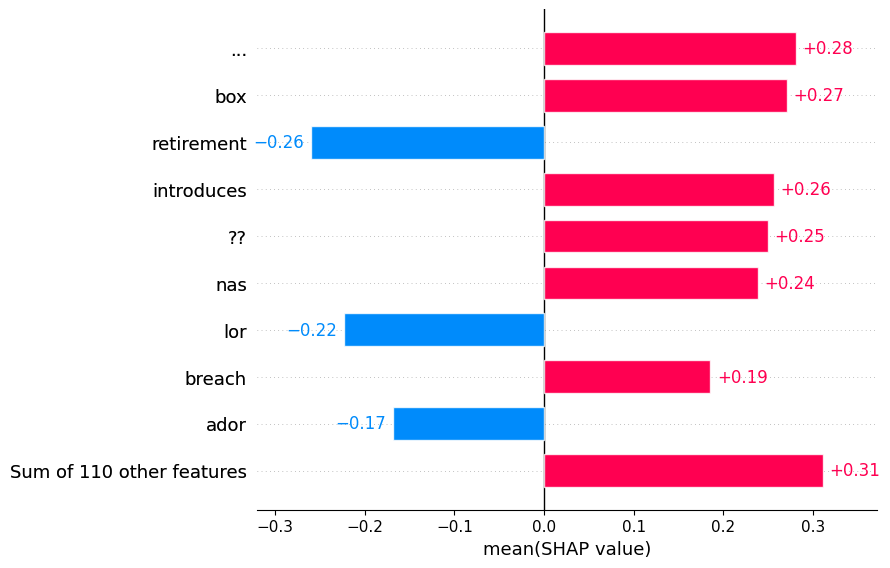

In [25]:
shap.plots.bar(shap_values_CB_train[:, :, "Neutral"].mean(0))

In [26]:
shap.plots.text(shap_values_DR_train[1, :, :]) 

In [27]:
shap.plots.text(shap_values_DR_train[4, :, :]) 

In [28]:
shap.plots.text(shap_values_CB_train[3, :, :]) 

In [60]:
shap.plots.text(shap_values_CB_train[4, :, :]) 

## Initial SHAP Analysis Evaluation

This section focuses on the interpretation of the application of SHAP explainer on the two models Distilroberta and Cryptobert which were tested on individual data sets. The aim is to reveal features in the different sentences that influence the evaluation of the sentiment analysis. 

By using SHAP explainter which is described in the SHAP documentaion (https://shap.readthedocs.io/en/latest/example_notebooks/text_examples/sentiment_analysis/Positive%20vs.%20Negative%20Sentiment%20Classification.html) it is therefore possible to examine the models. The results are described consequently:

1. **Shapvalues Distilroberta**
(The results highlight individual words which contribute to eighter positve, negative or neutral sentiments)


 - **SHAP bar chart - mean values:**
   - positive: The use of the word `rose` points out especially the highest value of +0.68. Consequenlty this shows that the precence of this word significantly contributes to a positive sentiment. Others are `up` with +0.66, and `increased` with +0.5. Since these features in the context of the financial market indicates an potential increase of the price of a stock, it can lead to future optimism about the performance of the stock
   - negative: In terms of negative sentiment, words such as `off` with +0.35 and, for example, `layoffs`, `employees` are influential.
   - neutral: However, tweets that are not related to financial/economic topics are set to neutral. In this case, the word `where` already points out a value of +0.46 for determining a neutral sentiment

  - **Investigation of individual tweets:**
    - A detailed view shows the analysis of individual tweets. It highlights that even the first tweet (Technopolis plans to develop in stages an area...) indicates a neutral sentiment. The word such as `telecommunication` without reference to financial stocks are especially significant. On the other hand, with regard to positive sentiment, the words `growth` and `sales` had the greatest influence in the tweet (According to the company 's updated strategy for the years 2009-2012,...) for predicting a positive sentiment.

2. **Shapvalues Cryptobert** (The results point out words which contribute to eighter Bullish, Bearish or Netural sentiments)
    - In comparison to distilroberta, it can be seen that words such as `retirement` +0.3, `me` +0.21 and `yeah` +0.2 achieve the highest mean values for a bullish sentiment. On average, however, words such as `tissue` -0.38 , `??` -0.27 and `box` -0.23 lead to a reduction in the score.

  - **Individual tweets:**
    - An investigation of individual tweets, points out that the model defines the third post (crypto.com introduces wapp program,...) as a neutral sentiment. Significant words are thereby: `introduces` and `breach`. The following fourth post (it's like it wants to go up so bad.) is cryptobert defined by cryrptobert as a Bullish sentiment, based on the words `it`, `wants`, `go`.

Overall, this already shows the significant influence of individual words within tweets on the sentiment score of the models


## Implementation Cryptobert and Distilroberta on the same dataset to compare restuls of SHAP

To get a better understanding,  the next step focuses on applying both models  on the same dataset. For this purpose, stock market data is selected that offers a particular advantage for the Distilroberta model, since cryptobert was trained especially on sentences related to cryptocurrencies. The reason for the selection of the dataset was especially the column `change_of_ticker` which illustrates how the price of the stock has changed after the tweet. This also makes it possible to further determine the performance of the models.

In [30]:
df_compare.head()

timestamp  \
0  2023-11-15T09:36:42.028000+00:00   
1  2023-11-15T06:01:59.788000+00:00   
2  2023-11-15T06:01:55.590000+00:00   
3  2023-11-15T06:01:51.329000+00:00   
4  2023-11-15T04:01:49.009000+00:00   

                                          tweet_text  \
0  $GOLD's Massive Range.\n\nIn the past ~year we...   
1  RT @SmartReversals: $SPX - Daily Chart:\n\n✅Ta...   
2  RT @SmartReversals: $NDX - Daily Chart:\n\n✅Ta...   
3  RT @SmartReversals: $IWM - Daily Chart:\n\n✅Ta...   
4  RT @coiledspringcap: Everyone has been concern...   

                                           tweet_url tweet_type  \
0  https://twitter.com/user/status/17247221551437...      tweet   
1  https://twitter.com/user/status/17246687922221...    retweet   
2  https://twitter.com/user/status/17246687824535...    retweet   
3  https://twitter.com/user/status/17246687591081...    retweet   
4  https://twitter.com/user/status/17246376898767...    retweet   

  price_of_ticker change_of_ticker tickers_mentioned      category  \
0       ['15.71']       ['+3.69%']         ['$GOLD']  stock_images   
1     ['4495.71']       ['+1.87%']          ['$SPX']  stock_images   
2   ['15812.473']       ['+2.08%']          ['$NDX']  stock_images   
3      ['178.46']       ['+5.21%']          ['$IWM']  stock_images   
4     ['4495.71']       ['+1.87%']          ['$SPX']  stock_images   

                                    clean_tweet_text  \
0  golds massive range past year weve swept lows ...   
1  rt spx daily chart target bull move mentioned ...   
2  rt ndx daily chart target bull move mentioned ...   
3  rt iwm daily chart target bull move mentioned ...   
4  rt everyone concerned concentration stockmarke...   

                                    Tweet_lemmatized  \
0  ['g', 'o', 'l', 'd', 's', ' ', 'm', 'a', 's', ...   
1  ['r', 't', ' ', 's', 'p', 'x', ' ', 'd', 'a', ...   
2  ['r', 't', ' ', 'n', 'd', 'x', ' ', 'd', 'a', ...   
3  ['r', 't', ' ', 'i', 'w', 'm', ' ', 'd', 'a', ...   
4  ['r', 't', ' ', 'e', 'v', 'e', 'r', 'y', 'o', ...   

                                        stemmed_text  
0  gold massiv rang past year weve swept low high...  
1  rt spx daili chart target bull move mention be...  
2  rt ndx daili chart target bull move mention be...  
3  rt iwm daili chart target bull move mention la...  
4  rt everyon concern concentr stockmarket well n...

Apply processing to select and modify specfic columns. Values are adjusted to ensure the right format and a clearer presentation

In [31]:
df_compare['change_of_ticker'] = df_compare['change_of_ticker'].str.extract(r'([-+]?\d+\.\d+|\d+)')
df_compare['price_of_ticker'] = df_compare['price_of_ticker'].str.extract(r'([-+]?\d+\.\d+|\d+)')
df_compare['tickers_mentioned'] = df_compare['tickers_mentioned'].str.extract(r'(\$[A-Za-z]+)')
df_compare['timestamp'] = pd.to_datetime(df_compare['timestamp'], format='mixed')
df_compare = df_compare.sort_values(by='timestamp')
df_compare = df_compare.reset_index(drop=True)
df_compare = df_compare[['timestamp', 'clean_tweet_text', 'tweet_type', 'price_of_ticker', 'change_of_ticker', 'tickers_mentioned']]
df_compare = df_compare.dropna()
df_compare.head()

timestamp  \
0 2021-12-27 16:59:17.621000+00:00   
1 2021-12-27 17:00:14.167000+00:00   
2 2021-12-27 17:04:55.943000+00:00   
3 2021-12-27 17:09:47.125000+00:00   
4 2021-12-27 17:19:22.613000+00:00   

                                    clean_tweet_text tweet_type  \
0  rt teva c underlying diff bidask interest volu...      tweet   
1  rt teva c underlying diff bidask interest volu...      tweet   
2  teva c underlying diff bidask interest volume ...      tweet   
3  analyst rating upgrades h gt downgrades cvna g...      tweet   
4  disca c underlying diff bidask interest volume...      tweet   

  price_of_ticker change_of_ticker tickers_mentioned  
0             8.5            +0.47             $TEVA  
1            8.48             +0.3             $TEVA  
2            8.49            +0.35             $TEVA  
3           94.24            +0.66                $H  
4           24.41            -0.04            $DISCA

For a comprehensive and detailed investigation of SHAP, sentences with more than 6 words were selected and the sample size was reduced to the first 30 tweets. 

In [32]:
df_compare_f = df_compare[(df_compare['clean_tweet_text'].str.split().apply(len) > 6)]
df_shap = df_compare_f.head(30)
df_shap.head()

timestamp  \
0 2021-12-27 16:59:17.621000+00:00   
1 2021-12-27 17:00:14.167000+00:00   
2 2021-12-27 17:04:55.943000+00:00   
3 2021-12-27 17:09:47.125000+00:00   
4 2021-12-27 17:19:22.613000+00:00   

                                    clean_tweet_text tweet_type  \
0  rt teva c underlying diff bidask interest volu...      tweet   
1  rt teva c underlying diff bidask interest volu...      tweet   
2  teva c underlying diff bidask interest volume ...      tweet   
3  analyst rating upgrades h gt downgrades cvna g...      tweet   
4  disca c underlying diff bidask interest volume...      tweet   

  price_of_ticker change_of_ticker tickers_mentioned  
0             8.5            +0.47             $TEVA  
1            8.48             +0.3             $TEVA  
2            8.49            +0.35             $TEVA  
3           94.24            +0.66                $H  
4           24.41            -0.04            $DISCA

#### Applying both models for conducting the sentiment analysis

In [33]:
#DistilRoberta
texts_DR = df_shap["clean_tweet_text"].tolist()

predictions = []
scores = []

for text in texts_DR:
    result = pipe_DR(text)[0]  
    predictions.append(result['label'])
    scores.append(result['score'])

df_shap['Sentiment_DR'] = predictions
df_shap['SentimentScore_DR'] = scores

/var/folders/t7/fsw9g80x43g_y23dd_1lqh9h0000gn/T/ipykernel_2084/1082780446.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shap['Sentiment_DR'] = predictions
/var/folders/t7/fsw9g80x43g_y23dd_1lqh9h0000gn/T/ipykernel_2084/1082780446.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shap['SentimentScore_DR'] = scores


In [34]:
df_shap.head()

timestamp  \
0 2021-12-27 16:59:17.621000+00:00   
1 2021-12-27 17:00:14.167000+00:00   
2 2021-12-27 17:04:55.943000+00:00   
3 2021-12-27 17:09:47.125000+00:00   
4 2021-12-27 17:19:22.613000+00:00   

                                    clean_tweet_text tweet_type  \
0  rt teva c underlying diff bidask interest volu...      tweet   
1  rt teva c underlying diff bidask interest volu...      tweet   
2  teva c underlying diff bidask interest volume ...      tweet   
3  analyst rating upgrades h gt downgrades cvna g...      tweet   
4  disca c underlying diff bidask interest volume...      tweet   

  price_of_ticker change_of_ticker tickers_mentioned Sentiment_DR  \
0             8.5            +0.47             $TEVA      neutral   
1            8.48             +0.3             $TEVA      neutral   
2            8.49            +0.35             $TEVA      neutral   
3           94.24            +0.66                $H     positive   
4           24.41            -0.04            $DISCA      neutral   

   SentimentScore_DR  
0           0.999876  
1           0.999876  
2           0.999875  
3           0.945680  
4           0.999863

In [35]:
#Cryptobert
texts = df_shap['clean_tweet_text'].astype(str).tolist()
predictions_fin = pipe_crypto(texts)

labels = [prediction['label'] for prediction in predictions_fin]
scores = [prediction['score'] for prediction in predictions_fin]

df_shap['Sentiment_CB'] = labels
df_shap['SentimentScore_CB'] = scores


/var/folders/t7/fsw9g80x43g_y23dd_1lqh9h0000gn/T/ipykernel_2084/1104567344.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shap['Sentiment_CB'] = labels
/var/folders/t7/fsw9g80x43g_y23dd_1lqh9h0000gn/T/ipykernel_2084/1104567344.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shap['SentimentScore_CB'] = scores


In [36]:
df_shap.head()

timestamp  \
0 2021-12-27 16:59:17.621000+00:00   
1 2021-12-27 17:00:14.167000+00:00   
2 2021-12-27 17:04:55.943000+00:00   
3 2021-12-27 17:09:47.125000+00:00   
4 2021-12-27 17:19:22.613000+00:00   

                                    clean_tweet_text tweet_type  \
0  rt teva c underlying diff bidask interest volu...      tweet   
1  rt teva c underlying diff bidask interest volu...      tweet   
2  teva c underlying diff bidask interest volume ...      tweet   
3  analyst rating upgrades h gt downgrades cvna g...      tweet   
4  disca c underlying diff bidask interest volume...      tweet   

  price_of_ticker change_of_ticker tickers_mentioned Sentiment_DR  \
0             8.5            +0.47             $TEVA      neutral   
1            8.48             +0.3             $TEVA      neutral   
2            8.49            +0.35             $TEVA      neutral   
3           94.24            +0.66                $H     positive   
4           24.41            -0.04            $DISCA      neutral   

   SentimentScore_DR Sentiment_CB  SentimentScore_CB  
0           0.999876      Neutral           0.947802  
1           0.999876      Neutral           0.947802  
2           0.999875      Neutral           0.842369  
3           0.945680      Neutral           0.787418  
4           0.999863      Neutral           0.876229

In [37]:
#Ensuring uniform interpretation of results regarding Sentiment prediction visualization
df_shap['Sentiment_DR'] = df_shap['Sentiment_DR'].map({'positive': 'Bullish', 'neutral': 'Neutral', 'negative': 'Bearish'})

/var/folders/t7/fsw9g80x43g_y23dd_1lqh9h0000gn/T/ipykernel_2084/1291679759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shap['Sentiment_DR'] = df_shap['Sentiment_DR'].map({'positive': 'Bullish', 'neutral': 'Neutral', 'negative': 'Bearish'})


Final dataset for investigating SHAP values

In [38]:
df_shap.head()

timestamp  \
0 2021-12-27 16:59:17.621000+00:00   
1 2021-12-27 17:00:14.167000+00:00   
2 2021-12-27 17:04:55.943000+00:00   
3 2021-12-27 17:09:47.125000+00:00   
4 2021-12-27 17:19:22.613000+00:00   

                                    clean_tweet_text tweet_type  \
0  rt teva c underlying diff bidask interest volu...      tweet   
1  rt teva c underlying diff bidask interest volu...      tweet   
2  teva c underlying diff bidask interest volume ...      tweet   
3  analyst rating upgrades h gt downgrades cvna g...      tweet   
4  disca c underlying diff bidask interest volume...      tweet   

  price_of_ticker change_of_ticker tickers_mentioned Sentiment_DR  \
0             8.5            +0.47             $TEVA      Neutral   
1            8.48             +0.3             $TEVA      Neutral   
2            8.49            +0.35             $TEVA      Neutral   
3           94.24            +0.66                $H      Bullish   
4           24.41            -0.04            $DISCA      Neutral   

   SentimentScore_DR Sentiment_CB  SentimentScore_CB  
0           0.999876      Neutral           0.947802  
1           0.999876      Neutral           0.947802  
2           0.999875      Neutral           0.842369  
3           0.945680      Neutral           0.787418  
4           0.999863      Neutral           0.876229

In [39]:
sentiment_counts_CB = df_shap['Sentiment_CB'].value_counts()
sentiment_counts_DR = df_shap['Sentiment_DR'].value_counts()

sentiment_counts_df = pd.DataFrame({ 'Sentiment_CB': sentiment_counts_CB, 'Sentiment_DR': sentiment_counts_DR }).reset_index().melt(id_vars='index', value_vars=['Sentiment_CB', 'Sentiment_DR'], var_name='Sentiment_Type', value_name='Count')
sentiment_counts_df.columns = ['Sentiment', 'Sentiment_Type', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Sentiment', y='Count', hue='Sentiment_Type', data=sentiment_counts_df, palette='viridis')
plt.title('Sentiment Distribution of both models based on the first 1000 tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Sentiment Type')
plt.show()

<h2>Applying SHAP Analysis

In [40]:
shap_text = df_shap['clean_tweet_text'].astype(str).tolist()

In [41]:
explainer_DR = shap.Explainer(pipe_DR)
shap_values_DR = explainer_DR(shap_text)

PartitionExplainer explainer: 31it [02:44,  5.86s/it]                        


In [42]:
explainer_CB = shap.Explainer(pipe_crypto)
shap_values_CB = explainer_CB(shap_text)

PartitionExplainer explainer: 31it [06:09, 12.75s/it]                        


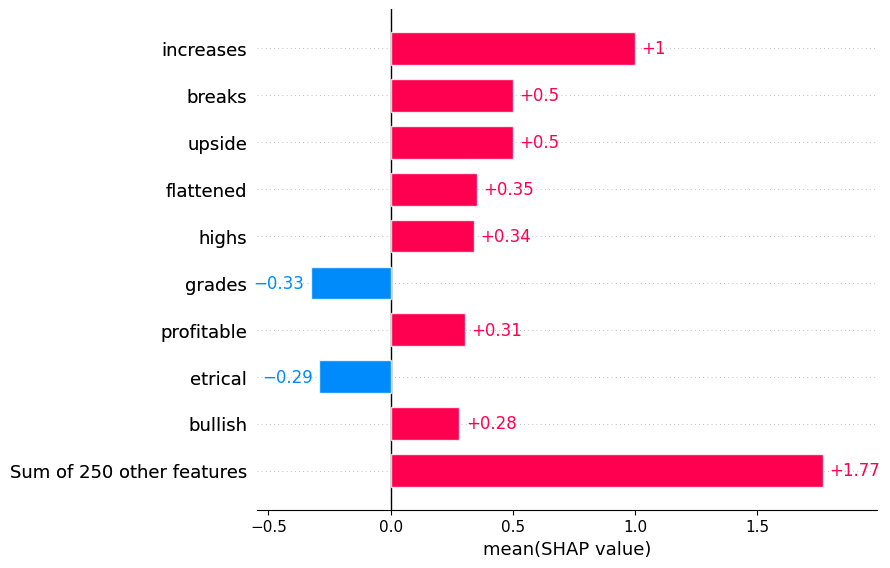

In [43]:
shap.plots.bar(shap_values_DR[:, :, "positive"].mean(0))

In [44]:
shap.plots.bar(shap_values_CB[:, :, "Bullish"].mean(0))

In [45]:
shap.plots.bar(shap_values_DR[:, :, "negative"].mean(0))

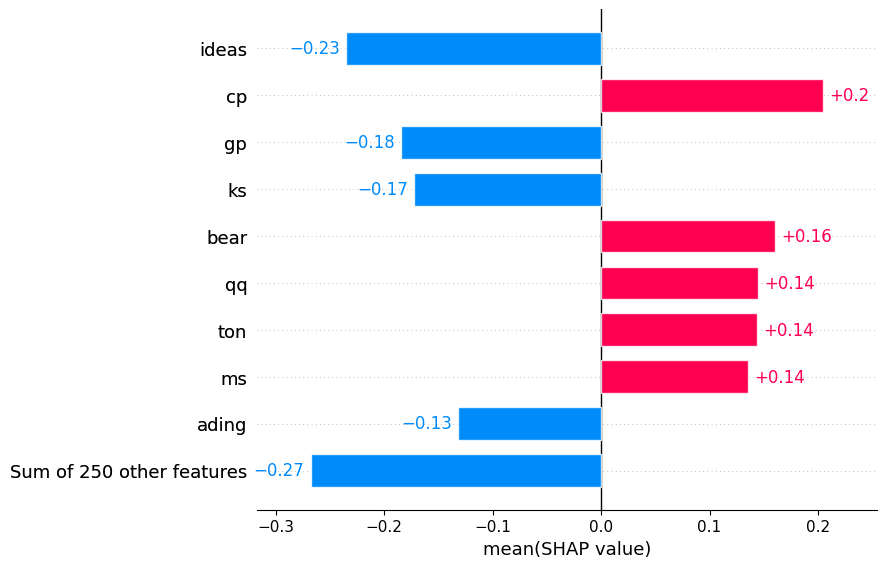

In [46]:
shap.plots.bar(shap_values_CB[:, :, "Bearish"].mean(0))

### Evaluation of individual tweets

In [47]:
df_shap = df_shap.reset_index(drop=True)

In [48]:
print(df_shap.iloc[19])

timestamp                             2021-12-27 20:15:04.700000+00:00
clean_tweet_text     expose lot insider trading options market here...
tweet_type                                                       tweet
price_of_ticker                                                  11.39
change_of_ticker                                                -71.95
tickers_mentioned                                                $BBIO
Sentiment_DR                                                   Bullish
SentimentScore_DR                                             0.971286
Sentiment_CB                                                   Neutral
SentimentScore_CB                                             0.686943
Name: 19, dtype: object


In [49]:
shap.plots.text(shap_values_DR[19, :, :]) 

In [50]:
shap.plots.text(shap_values_CB[19, :, :]) 

In [51]:
print(df_shap.iloc[14])

timestamp                             2021-12-27 18:32:45.429000+00:00
clean_tweet_text     use flow pocket pattern become profitable tsla...
tweet_type                                                       tweet
price_of_ticker                                                1110.45
change_of_ticker                                                 +4.07
tickers_mentioned                                                $TSLA
Sentiment_DR                                                   Bullish
SentimentScore_DR                                             0.999334
Sentiment_CB                                                   Neutral
SentimentScore_CB                                             0.775428
Name: 14, dtype: object


In [52]:
shap.plots.text(shap_values_DR[14, :, :]) 

In [53]:
shap.plots.text(shap_values_CB[14, :, :]) 

In [54]:
print(df_shap.iloc[15])

timestamp                             2021-12-27 18:33:10.423000+00:00
clean_tweet_text     spy weekly update new ath today flattened accd...
tweet_type                                                       tweet
price_of_ticker                                                 475.97
change_of_ticker                                                 +1.14
tickers_mentioned                                                 $SPY
Sentiment_DR                                                   Bearish
SentimentScore_DR                                             0.928792
Sentiment_CB                                                   Bullish
SentimentScore_CB                                             0.609883
Name: 15, dtype: object


In [55]:
shap.plots.text(shap_values_DR[15, :, :]) 

In [56]:
shap.plots.text(shap_values_CB[15, :, :]) 

## Results SHAP Analysis on the same dataset

 - **SHAP bar chart Distilroberta - mean values:**
   - positive: on average, a decisive contributor for the prediction of a positive sentiment is primarily `ìncrease` with +1, `breaks` and `upside` with +0.5, `flattened` with 0.35 as well as `highs` with +0.43. The word `bullish` achieves a value of +0.28. As a result, it can be observed that these words particularly indicate a future price increase and thus also lead to a positive sentiment for the model.
   - negative: On the other hand, words like `back` with +0.32, or `towards` with +0.11 and `grades`, `down`, `today`, `falttened` with each +0.09 are significant for a negative sentiment.
  
 - **SHAP bar chart Cryptobert - mean values:**
   - Bullish: For a bullish sentiment based on the cryptobert model, words such as `higher` with +0.26, `accumulation` and `whales` with +0.23 each are the most decisive
   - Bearish: With regard to Bearish, however, it can be seen that particularly short terms such as `cp` with +0.2, `bear`with +0.16 contribute to this sentiment

  - **Investigation of individual tweets:**
    -  `expose lot insider trading options market here...` An analysis of this tweet demonstrates that Distrilroberta defines a positive  while Cryptobert defines a neutral sentiment. For Distilroberta, significant contributors are words like `bullish` and `flow`. Cryptobert, however, identifies words like `options`, `trading` and `showing` as decisive for a neutral sentiment. It is interesting to note that both models did not assign a negative sentiment although after the tweet the price decreased by -71.95%. 

    -  `use flow pocket pattern become profitable tsla...` The second selected tweet shows a positive price change. Here you can also see that Distrilroberter selects a positive sentiment based on the words `profitable`, `become`  and `bullish`. On the other hand, Cryptobert again defines a neutral sentiment based on the words `chart`, `rad` and `amd`. 

    -  `spy weekly update new ath today flattened accd...` illustrates another interesting result. This shows that while Distilroberta defines a negative sentiment due to words `like`, `back` and `towards`, cryptobert defines a bullish sentiment due to `new`, `accumulation` and `ath` (all time high). It can also be seen that the price slightly increased after the tweet, which leads to the conclusion that cryptobert performed better on this tweet.


    



# Usage of SHAP on a web application

SHAP in a limited context does only provide so much value to the user. Sentiment for specific things are short lived and are changing fast, especially in finance. Thus, we tried to expand our scope and take a look at different use cases for a web application that does not force you to implement everything locally on a notebook.

We used streamlit.com for this application. Streamlit is an open-source Python framework designed for creating and sharing data-driven web applications. It simplifies the process of turning data scripts into interactive apps, requiring only a few lines of code.

- Streamlit was used for two reasons:
    1. Easy of application: you can basically set it up in less than 10 minutes and add your code step-wise without a lot of overhead.
    2. Free hosting: It allows you to make it accessible for multiple people at once
- The app can be accessed using this link: https://sentiment-analysis-stock.streamlit.app/
    - Warnings:
        1. If it is not used for a while, the app "sleeps" and needs to be launched again. This can be done via clicking on the button on the website.
        2. Since this was done step-by-step little effort has been put into optimisation of the whole application. Once it is running, it stays pretty stable but crashes are not a rarity. It takes a while to be up and running.
        3. The "Tweet-Link" section does, unfortunately, not work. The idea was that you could just copy and paste a link to get a sentiment analysis of the text in the tweet. However, Selenium would be necessary for that and it seems like the streamlit integration for that is hard to create. The idea would've been to show how you can also use it to understand social-media engagement better as a POC for, e.g., real-time sentiment tracking on your account or relevant hashtags.
        The tweet-link scraper can be found under "SHAP_application" in the notebook "analysis_serverV2.ipynb"
- Overall, all files are hosted on a different github, since streamlit loads everything of the repository and would thus load too much information if this repo is connected. The repository is: https://github.com/premstaller1/SHAP_app.git

- Everything else is explained in the notebooks themselves.

## Conclusion and key insights
Overall, the use of SHAP in sentiment analyses for the distilroberta and cryptobert models leads to a better understanding in terms of transparency, explainability and accountability. The analysis therefore makes it possible to identify which individual words within social media posts are crucial for the models to determine the sentiment score. In particular, it shows that the pre-processing of the data and individual words also play an important role in the performance of the models. It also highlights that while Distilroberta has a high performance on stock datasets, Cryptobert is also a suitable model to determine the sentiment of individual tweets. As a result, the use of SHAP offers an additional opportunity to better understand and continuously improve the effectiveness of mashine learning models.

## Future Perspective

Future projects could primarily investigate models that aim to analyze the price of individual stocks or cryptocurrencies. It can be determined whether the integration of sentiment scores based on tweets leads to better performance and which features have a significant influence on the prediction